In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import Ridge

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

# read data



In [5]:
# read data
df_train_data = pd.read_csv('data/zhengqi_train.txt', sep='\t', encoding='utf-8')
df_test_data = pd.read_csv('data/zhengqi_test.txt', sep='\t', encoding='utf-8')

In [14]:
df_train_data.describe()


,V0,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V29,V30,V31,V32,V33,V34,V35,V36,V37,target
count,2888.000000,2888.000000,2888.000000,2888.000000,2888.000000,2888.000000,2888.000000,2888.000000,2888.000000,2888.000000,...,2888.000000,2888.000000,2888.000000,2888.000000,2888.000000,2888.000000,2888.000000,2888.000000,2888.000000,2888.000000
mean,0.123048,0.056068,0.289720,-0.067790,0.012921,-0.558565,0.182892,0.116155,0.177856,-0.169452,...,0.097648,0.055477,0.127791,0.020806,0.007801,0.006715,0.197764,0.030658,-0.130330,0.126353
std,0.928031,0.941515,0.911236,0.970298,0.888377,0.517957,0.918054,0.955116,0.895444,0.953813,...,1.061200,0.901934,0.873028,0.902584,1.006995,1.003291,0.985675,0.970812,1.017196,0.983966
min,-4.335000,-5.122000,-3.420000,-3.956000,-4.742000,-2.182000,-4.576000,-5.048000,-4.692000,-12.891000,...,-2.912000,-4.507000,-5.859000,-4.053000,-4.627000,-4.789000,-5.695000,-2.608000,-3.630000,-3.044000
25%,-0.297000,-0.226250,-0.313000,-0.652250,-0.385000,-0.853000,-0.310000,-0.295000,-0.159000,-0.390000,...,-0.664000,-0.283000,-0.170250,-0.407250,-0.499000,-0.290000,-0.202500,-0.413000,-0.798250,-0.350250
50%,0.359000,0.272500,0.386000,-0.044500,0.110000,-0.466000,0.388000,0.344000,0.362000,0.042000,...,-0.023000,0.053500,0.299500,0.039000,-0.040000,0.160000,0.364000,0.137000,-0.185500,0.313000
75%,0.726000,0.599000,0.918250,0.624000,0.550250,-0.154000,0.831250,0.782250,0.726000,0.042000,...,0.745250,0.488000,0.635000,0.557000,0.462000,0.273000,0.602000,0.644250,0.495250,0.793250
max,2.121000,1.918000,2.828000,2.457000,2.689000,0.489000,1.895000,1.918000,2.245000,1.335000,...,4.580000,2.689000,2.013000,2.395000,5.465000,5.110000,2.324000,5.238000,3.000000,2.538000


In [15]:
df_test_data.describe()



,V0,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V28,V29,V30,V31,V32,V33,V34,V35,V36,V37
count,1925.000000,1925.000000,1925.000000,1925.000000,1925.000000,1925.000000,1925.000000,1925.000000,1925.000000,1925.000000,...,1925.000000,1925.000000,1925.000000,1925.000000,1925.000000,1925.000000,1925.000000,1925.000000,1925.000000,1925.000000
mean,-0.184404,-0.083912,-0.434762,0.101671,-0.019172,0.838049,-0.274092,-0.173971,-0.266709,0.255114,...,-0.206871,-0.146463,-0.083215,-0.191729,-0.030782,-0.011433,-0.009985,-0.296895,-0.046270,0.195735
std,1.073333,1.076670,0.969541,1.034925,1.147286,0.963043,1.054119,1.040101,1.085916,1.014394,...,1.064140,0.880593,1.126414,1.138454,1.130228,0.989732,0.995213,0.946896,1.040854,0.940599
min,-4.814000,-5.488000,-4.283000,-3.276000,-4.921000,-1.168000,-5.649000,-5.625000,-6.059000,-6.784000,...,-2.435000,-2.413000,-4.507000,-7.698000,-4.057000,-4.627000,-4.789000,-7.477000,-2.608000,-3.346000
25%,-0.664000,-0.451000,-0.978000,-0.644000,-0.497000,0.122000,-0.732000,-0.509000,-0.775000,-0.390000,...,-0.453000,-0.818000,-0.339000,-0.476000,-0.472000,-0.460000,-0.290000,-0.349000,-0.593000,-0.432000
50%,0.065000,0.195000,-0.267000,0.220000,0.118000,0.437000,-0.082000,0.018000,-0.004000,0.401000,...,-0.445000,-0.199000,0.010000,0.100000,0.155000,-0.040000,0.160000,-0.270000,0.083000,0.152000
75%,0.549000,0.589000,0.278000,0.793000,0.610000,1.928000,0.457000,0.515000,0.482000,0.904000,...,-0.434000,0.468000,0.447000,0.471000,0.627000,0.419000,0.273000,0.364000,0.651000,0.797000
max,2.100000,2.120000,1.946000,2.603000,4.475000,3.176000,1.528000,1.394000,2.408000,1.766000,...,4.656000,3.022000,3.139000,1.428000,2.299000,5.465000,5.110000,1.671000,2.861000,3.021000


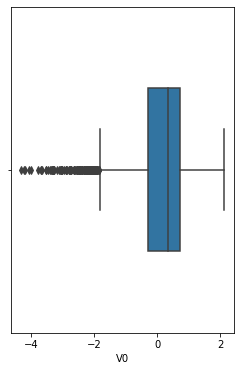

In [8]:
fig = plt.figure(figsize=(4, 6))
sns.boxplot(df_train_data['V0'], orient='y', width=0.5)

# there are outliers in col V0
# many of them are under 4th quarter point

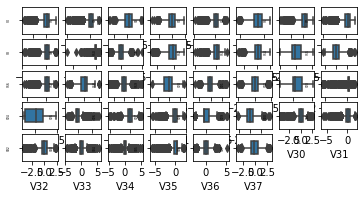

In [9]:
# get column name
columns = df_train_data.columns.to_list()[:39]
fig = plt.Figure(figsize=(80, 60), dpi=75)
for i in range(38):
    plt.subplot(7, 8, i+1)
    sns.boxplot(df_train_data[columns[i]], orient='v', width=0.5)
    plt.ylabel(columns[i], fontsize=3)

plt.show()

# we NEED to do data cleaning with outliers

# Outlier Detection



In [12]:
def find_outliers(model, x, y, sigma=3):
    """

    @param model:
    @type model:
    @param x:
    @type x:
    @param y:
    @type y:
    @param sigma:
    @type sigma:
    @return:
    @rtype:
    """
    # predict y values using model
    try:
        y_pred = pd.Series(model.predict(x), index=y.index)
    # if predicting fails, try fitting the model first
    except:
        model.fit(x,y)
        y_pred = pd.Series(model.predict(x), index=y.index)
        
    # calculate residuals between the model prediction and true y values
    residuals = y - y_pred
    residuals_mean = residuals.mean()
    residuals_std = residuals.std()

    # calculate z statistic, define outliers to be where |z|>sigma
    z = (residuals - residuals_mean) / residuals_std
    outliers = z[abs(z) > sigma].index
    
    # print and plot the results
    print('R2 =', model.score(x, y))
    # print('rmse=', rmse(y, y_pred))
    print("mse=", mean_squared_error(y,y_pred))
    print('---------------------------------------')

    print('mean of residuals:', residuals_mean)
    print('std of residuals:', residuals_std)
    print('---------------------------------------')

    print(len(outliers),'outliers:')
    print(outliers.tolist())

    # construct plots
    plt.figure(figsize=(15,5))

    ax_131 = plt.subplot(1,3,1)
    plt.plot(y,y_pred,'.')
    plt.plot(y.loc[outliers],y_pred.loc[outliers],'ro')
    plt.legend(['Accepted','Outlier'])
    plt.xlabel('y')
    plt.ylabel('y_pred')

    ax_132 = plt.subplot(1,3,2)
    plt.plot(y,y-y_pred,'.')
    plt.plot(y.loc[outliers],y.loc[outliers]-y_pred.loc[outliers],'ro')
    plt.legend(['Accepted','Outlier'])
    plt.xlabel('y')
    plt.ylabel('y - y_pred')

    ax_133=plt.subplot(1,3,3)
    z.plot.hist(bins=50,ax=ax_133)
    z.loc[outliers].plot.hist(color='r',bins=50,ax=ax_133)
    plt.legend(['Accepted','Outlier'])
    plt.xlabel('z')
    
    plt.savefig('tmp_res/outliers.png')
    
    return outliers

R2 = 0.8890858938210386
mse= 0.10734857773123632
---------------------------------------
mean of residuals: 3.075410040512899e-17
std of residuals: 0.32769766731934985
---------------------------------------
31 outliers:
[321, 348, 376, 777, 884, 1145, 1164, 1310, 1458, 1466, 1484, 1523, 1704, 1874, 1879, 1979, 2002, 2279, 2528, 2620, 2645, 2647, 2667, 2668, 2669, 2696, 2767, 2769, 2807, 2842, 2863]


Int64Index([ 321,  348,  376,  777,  884, 1145, 1164, 1310, 1458, 1466, 1484,
            1523, 1704, 1874, 1879, 1979, 2002, 2279, 2528, 2620, 2645, 2647,
            2667, 2668, 2669, 2696, 2767, 2769, 2807, 2842, 2863],
           dtype='int64')

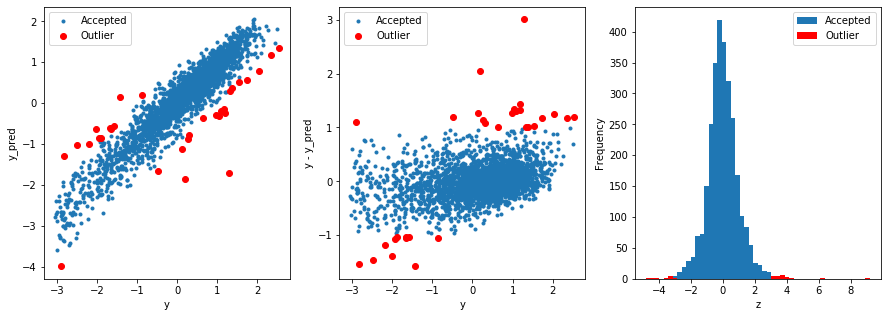

In [13]:
x_train = df_train_data.iloc[:, 0: -1]
y_train = df_train_data.iloc[:, -1]

detect_model = Ridge()
find_outliers(detect_model, x_train, y_train)